In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_data = session.execute("SELECT MAX(date) FROM Measurement").fetchone()
most_recent_data

('2017-08-23',)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Inches')]

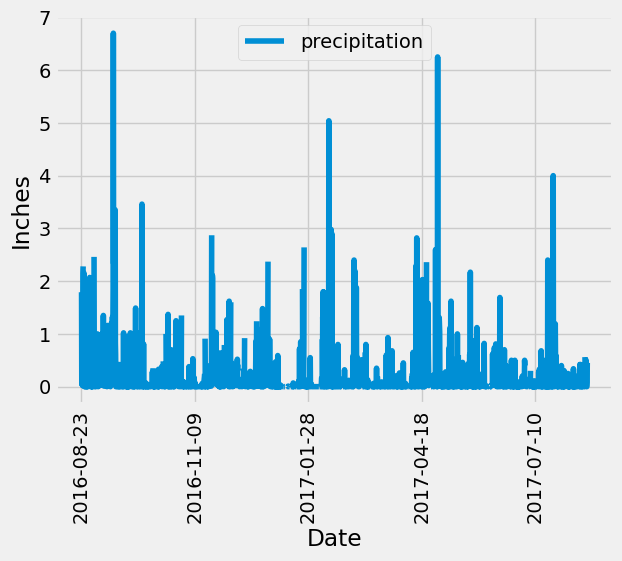

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dict(most_recent_data)['MAX(date)']

# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(most_recent_date, '%Y-%m-%d').date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_precipitation_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precipitation_scores_df = pd.DataFrame(date_precipitation_scores, columns=['date','precipitation'])
date_precipitation_scores_df.set_index(date_precipitation_scores_df['date'], inplace=True)

# Sort the dataframe by date
date_precipitation_scores_df = date_precipitation_scores_df.sort_index()
date_precipitation_scores_df
# Use Pandas Plotting with Matplotlib to plot the data
date_precipitation_scores_df.plot(rot=90).set(xlabel="Date", ylabel="Inches")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_precipitation_scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#Answer the following question: which station id has the greatest number of observations?
most_active_station_id = dict(list(most_active_stations)[0])["station"]

print(f"Station {most_active_station_id} has the greated number of observations")

Station USC00519281 has the greated number of observations


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == most_active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

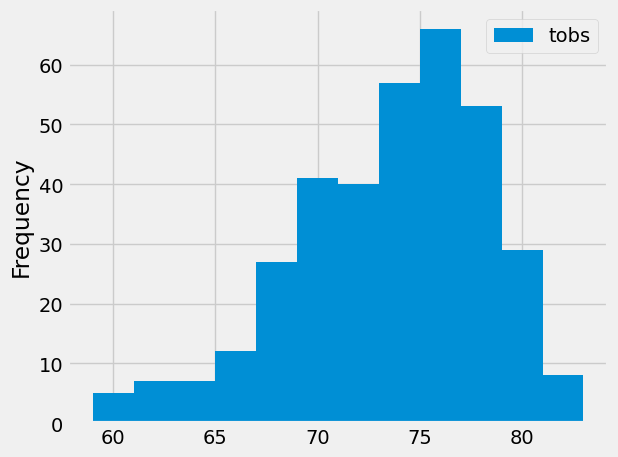

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temperature_data = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= prev_year).all()
twelve_month_temperature_data_df = pd.DataFrame(twelve_month_temperature_data, columns=['tobs'])
twelve_month_temperature_data_df.plot.hist(bins=12)
plt.tight_layout()

# Close Session

In [17]:
# Close Session
session.close()